In [1]:
from polyglot.text import Text   #形態素解析

from nltk.tokenize import sent_tokenize

import numpy as np

import re  #正規表現

In [2]:
text_1 = """\
Cafe Colombo is always busy. There are always people sitting at the tables in Cafe Colombo. The men and women are all well-dressed. They drink coffee. They eat ice-cream. They read newspapers. Charlie does not sit in Cafe Colombo. Charlie is not well-dressed. He sits on the pavement outside Cafe Colombo. He sits on a small box. Charlie is a shoeshine boy. Charlie shines shoes. He does not go to school. He works all day. Charlie shines men’s shoes. He shines ladies’ shoes. He shines black shoes. He shines brown shoes. He shines blue shoes. A man in Cafe Colombo shouts, ‘Charlie!’ Charlie runs into Cafe Colombo. He puts his box at the man’s feet. The man puts one foot on the box. The man’s shoes are black. The man’s shoes are dirty. Charlie cleans the man’s shoes.\
"""

text_2 = """\
Anna did not sleep all night. She was excited. Early in the morning, her father called her. 'Come on, Anna! It's time to get up. It's a long way to the station.' Anna got dressed and she was soon ready. She did not eat any breakfast. She was nervous. She was going to visit her aunt in Naira. She was going alone in a train for the first time. Anna and her father left the village and began to walk to the station. It was a long way. They reached the station at midday. 3 Soon the train came. It was nearly empty. Anna got in. She was frightened. It was her first journey away from home. 'Your aunt will meet you at Naira,' her father said. 'Be careful now, Anna. Don't talk to any strangers.' The train started suddenly. Soon it was going fast. Anna watched her father. He looked smaller and smaller; then he disappeared. The train journey was very long. Anna looked out of the window. The fields, trees, villages and animals rushed past. After a long time, she began to feel sleepy. She was very tired. Slowly, she fell asleep. Later, Anna woke up. It was dark outside. She felt small and lost. She was a long way from her village and her father.\
"""

text_3 = """\
It was three o’clock in the afternoon on the day before Christmas – Christmas Eve. In the city of London it was very cold and almost dark. But it had been almost dark all day. There was no sunlight because it was winter and it was very foggy. It was possible to hear people and horses and carriages. But it was not possible to see them because the fog was so thick. Two names were painted on the door of an old build-ing in the centre of the city: Scrooge and Marley. Jacob Marley had died seven years ago. But Ebenezer Scrooge had left Marley’s name on the door of the building. Scrooge answered if people called him Scrooge and he answered if people called him Marley. Scrooge did not care what people called him. Scrooge did not care about people. Scrooge cared about one thing – money! He worked very hard all the time and he earned lots of money. But he did not like spending money. Ebenezer Scrooge was an old man. His face was thin and his nose was long and thin. His hair, eyebrows and whiskers were all white. Scrooge never smiled. He had no friends. Nobody visited his house. Nobody said hello to him as he walked along the street. No beggar stopped him in the street and asked him for money. No dog went near him. But Scrooge wanted his life to be this way. He did not like people. He liked writing down amounts of money in his account books.\"""
"""

text_4 = """\
The little town of Vevey, in Switzerland, stands beside Lake Geneva. Many travelers come to visit the beautiful blue lake, and so its shore 13 is crowded with 14 hotels. There are many different kinds of hotel around the lake. There are new, grand hotels which are painted white. And there are also small pensions—simple, old hotels with just a few rooms. The grand hotels have lots of rooms with big windows, and flags fly on their roofs. The pensions are smaller, with fewer rooms. However, one of the hotels in Vevey is very different from the others because it is old but also very comfortable. This hotel is named the Trois Couronnes—the ThreeCrowns 15.The hotel is very popular with Americans. Many American travelers visit Vevey in summer and a lot of them stay at the Trois Couronnes. At this time, the town is full of fashionable 16 young girls in beautiful dresses. At night in the hotel, you can hear the sounds of excited voices and lively music. The voices have American accents17and an orchestra plays dance music. You can almost believe that you are in America! However, the Trois Couronnes is a European hotel. It has neatlsy-dressed18German waiters. And in the garden you might meet a Russian princess, or the son of a Polish gentleman.\
"""

text_5 = """\
My name is Jonathan Harker. I am a lawyer and I live in London. About seven years ago, some strange and terrible things happened to me. Many of my dear friends were in danger too. At last we have decided to tell the story of that terrible time. Part of my work is to find houses in England for rich people who live in foreign countries. At the beginning of 1875, I received a letter from Transylvania, a country in Eastern Europe. The letter was from a rich man called Count Dracula. He wanted to buy a house near London. The Count asked me to find him an old house with a large garden. The price of the house was not important. I found him a large, old house to the east of London. I wrote to the Count and he agreed to buy it. There were many papers which he had to sign. To my surprise, Count Dracula invited me to visit him in his castle in Transylvania. ‘Bring the papers with you,’ he wrote in his letter. ‘I can sign them here.’ I was very busy and did not want to go. Transylvania was faraway and few English people had been there. There was another reason too. I was going to get married in the autumn to my darling Mina. I did not want to leave England until we were married. But Mina said that I should go. ‘The Count is a rich man,’ she said. ‘You may be able to do more business with him. You can travel most of the way by train. In two weeks, you will be home again. ’So I accepted Count Dracula’s invitation. I left England at the end of April. Mina gave me a book about Transylvania to read on the train.\
"""

text_6 = """\
London, 1852. London in November. It was cold winter weather. There was mud in the streets. Dogs were covered in mud, almost drowned in it. Horses, pulling carriages 3 through the city streets, were splashed up to their eyes. Shivering crossing-sweepers 3 tried hard to sweep back the mud and dirt on the busy roads. There was fog too. The fog was everywhere. It came up the river and down the river. Fog covered the boats on the river and filled the boatmen’s eyes. Street lamps sent a pale, yellow light through the thick, foggy air. Cold, mud and fog filled the streets of London. And the fog was thickest and the mud was deepest near Lincoln’s Inn, the very heart of London. The Lord High Chancellor was there, sitting in his High Court of Chancery. Some of the fog and the mud had got into the courtroom too. Perhaps a little fog and mud had got into the minds of the people in the High Court of Chancery. Chancery had ruined5many men and driven others to mad-ness. Whole families had been destroyed by Chancery and Chancery had brought great houses to decay and destruction. The streets of London were dark that day and in the Court of Chancery it was darker. The case before the Court was the case of Jarndyce and Jarndyce, and that case had never done anyone any good. The lawyers had lost all interest in Jarndyce and Jarndyce many years before. Whole families had been born and died during the history of Jarndyce and Jarndyce. Pretty young wards of court had grown old and sad; strong young men had lost hope, and still the case had not ended. Over the years, Jarndyce and Jarndyce had slowly ruined the lives of many innocent people.\"""

In [3]:
#文章のクリーニング（ピリオド以外の記号を削除）
code_regex = re.compile('[!"#$%&\'\\\\()*+,\-/:;<=>?@[\\]^_`{|}~「」〔〕“”〈〉『』【】＆＊・（）＄＃＠、—？！｀＋￥％]')
cleaned_text = code_regex.sub('', text)
print(cleaned_text)


#形態素解析
tokens = Text(cleaned_text)

tag_list = []
tango_list = []
for token in tokens.pos_tags:
        tag_list.append(token[1])
        tango_list.append(token[0])
        
tag_arr = np.array(tag_list)
print(tag_arr)

Anna did not sleep all night. She was excited. Early in the morning her father called her. Come on Anna Its time to get up. Its a long way to the station. Anna got dressed and she was soon ready. She did not eat any breakfast. She was nervous. She was going to visit her aunt in Naira. She was going alone in a train for the first time. Anna and her father left the village and began to walk to the station. It was a long way. They reached the station at midday. 3 Soon the train came. It was nearly empty. Anna got in. She was frightened. It was her first journey away from home. Your aunt will meet you at Naira her father said. Be careful now Anna. Dont talk to any strangers. The train started suddenly. Soon it was going fast. Anna watched her father. He looked smaller and smaller then he disappeared. The train journey was very long. Anna looked out of the window. The fields trees villages and animals rushed past. After a long time she began to feel sleepy. She was very tired. Slowly she fe

In [4]:
#ラベルエンコーディング
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(tag_arr)
num_tag = le.transform(tag_arr)
print(le.classes_)

print(num_tag.size)

['ADJ' 'ADP' 'ADV' 'AUX' 'CONJ' 'DET' 'NOUN' 'NUM' 'PART' 'PRON' 'PROPN'
 'PUNCT' 'SCONJ' 'VERB']
253


In [11]:
#データ保存
import pandas as pd

df = pd.DataFrame(num_tag)

file_name = 'ISBM-1'
df.to_csv('./ER-numData/' + file_name + '.csv')

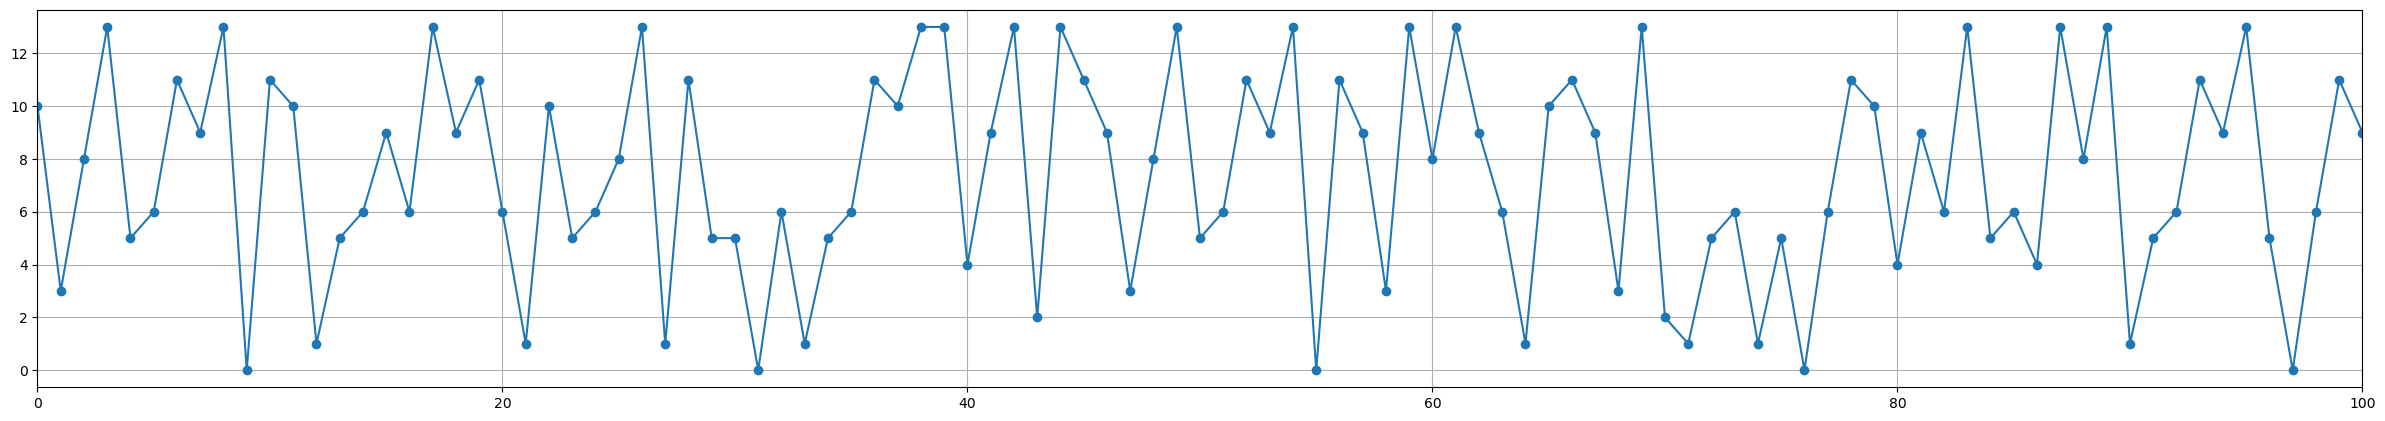

In [6]:
#プロット
%matplotlib inline
import matplotlib.pyplot as plt

data = num_tag

plt.figure(figsize=(30, 5), dpi=100)
plt.plot(data, 'o', linestyle='-')

plt.xlim(0,100) #x軸範囲指定
plt.grid(True)